In [1]:
# import common libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Load and prepare dataset
# use / in path not \
dfHR = pd.read_csv("C:/Users/hridi/OneDrive/Desktop/Spring 2024/DSBA 6211 Advanced Business Analytics/assignment 02/BankChurn.csv")

In [3]:
dfHR.head(20)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1
1,15647311,608,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,15619304,502,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,15701354,699,France,Female,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0
4,15737888,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,15574012,645,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
6,15592531,822,France,Male,50.0,7.0,NaN,2.0,1.0,1.0,10062.80,0
7,15656148,376,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1
8,15792365,501,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
9,15592389,684,France,NaN,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0


In [4]:
dfHR.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           9994 non-null   object 
 3   gender            9993 non-null   object 
 4   age               9999 non-null   float64
 5   tenure            9998 non-null   float64
 6   balance           6383 non-null   float64
 7   products_number   9995 non-null   float64
 8   credit_card       9998 non-null   float64
 9   active_member     9999 non-null   float64
 10  estimated_salary  9998 non-null   float64
 11  churn             10000 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 937.6+ KB


In [5]:
dfHR.isnull().any()
dfHR.isnull().sum(axis=0)

customer_id            0
credit_score           0
country                6
gender                 7
age                    1
tenure                 2
balance             3617
products_number        5
credit_card            2
active_member          1
estimated_salary       2
churn                  0
dtype: int64

In [6]:
#Null % per each column
(dfHR.isnull().sum()/(len(dfHR)))*100

customer_id          0.00
credit_score         0.00
country              0.06
gender               0.07
age                  0.01
tenure               0.02
balance             36.17
products_number      0.05
credit_card          0.02
active_member        0.01
estimated_salary     0.02
churn                0.00
dtype: float64

C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


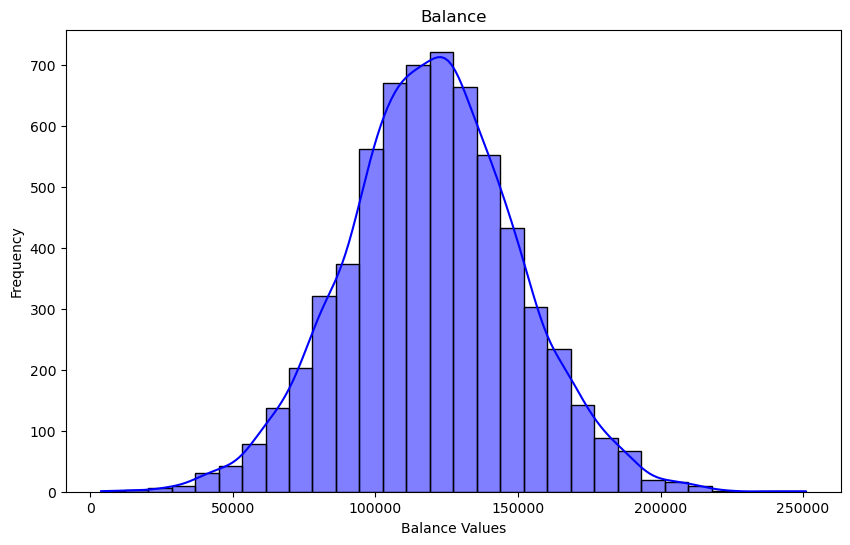

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution of balance
balance = dfHR['balance']

# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(balance, kde=True, bins=30, color='blue')
plt.title('Balance')
plt.xlabel('Balance Values')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Impute the mean of the 'balance' column for null values
mean_balance = dfHR['balance'].mean()
dfHR['balance'].fillna(mean_balance, inplace=True)
dfHR.head(20)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42.0,2.0,119827.493793,1.0,1.0,1.0,101348.88,1
1,15647311,608,Spain,Female,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.58,0
2,15619304,502,France,Female,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.57,1
3,15701354,699,France,Female,39.0,1.0,119827.493793,2.0,0.0,0.0,93826.63,0
4,15737888,850,Spain,Female,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.10,0
5,15574012,645,Spain,Male,44.0,8.0,113755.780000,2.0,1.0,0.0,149756.71,1
6,15592531,822,France,Male,50.0,7.0,119827.493793,2.0,1.0,1.0,10062.80,0
7,15656148,376,Germany,Female,29.0,4.0,115046.740000,4.0,1.0,0.0,119346.88,1
8,15792365,501,France,Male,44.0,4.0,142051.070000,2.0,0.0,1.0,74940.50,0
9,15592389,684,France,NaN,27.0,2.0,134603.880000,1.0,1.0,1.0,71725.73,0


In [9]:
# Drop remaining rows with null values in other columns
dfHR_non_null = dfHR.dropna()

# Display information about the non-null DataFrame
dfHR_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9985 non-null   int64  
 1   credit_score      9985 non-null   int64  
 2   country           9985 non-null   object 
 3   gender            9985 non-null   object 
 4   age               9985 non-null   float64
 5   tenure            9985 non-null   float64
 6   balance           9985 non-null   float64
 7   products_number   9985 non-null   float64
 8   credit_card       9985 non-null   float64
 9   active_member     9985 non-null   float64
 10  estimated_salary  9985 non-null   float64
 11  churn             9985 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 1014.1+ KB


In [10]:
dfHR_non_null.isnull().any()
dfHR_non_null.isnull().sum(axis=0)

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [11]:
dfHR_data = dfHR_non_null.drop(['customer_id'], axis=1)
dfHR_data.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42.0,2.0,119827.493793,1.0,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1.0,119827.493793,2.0,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.10,0
5,645,Spain,Male,44.0,8.0,113755.780000,2.0,1.0,0.0,149756.71,1
6,822,France,Male,50.0,7.0,119827.493793,2.0,1.0,1.0,10062.80,0
7,376,Germany,Female,29.0,4.0,115046.740000,4.0,1.0,0.0,119346.88,1
8,501,France,Male,44.0,4.0,142051.070000,2.0,0.0,1.0,74940.50,0
10,528,France,Male,31.0,6.0,102016.720000,2.0,0.0,0.0,80181.12,0


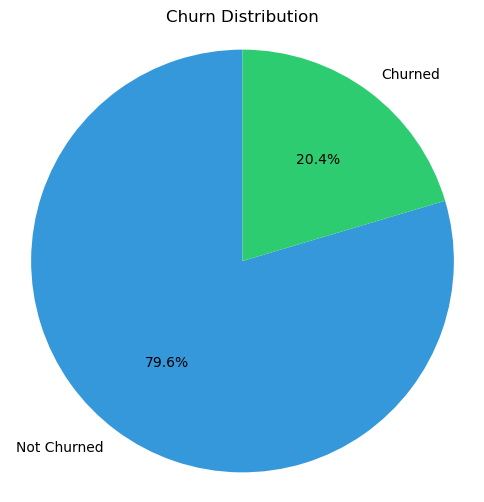

In [78]:
# EDA - Churn distribution
plt.figure(figsize=(6, 6))

# Define colors
colors = ['#3498db', '#2ecc71'] 

churn_counts = dfHR_data['churn'].value_counts()
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()


C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

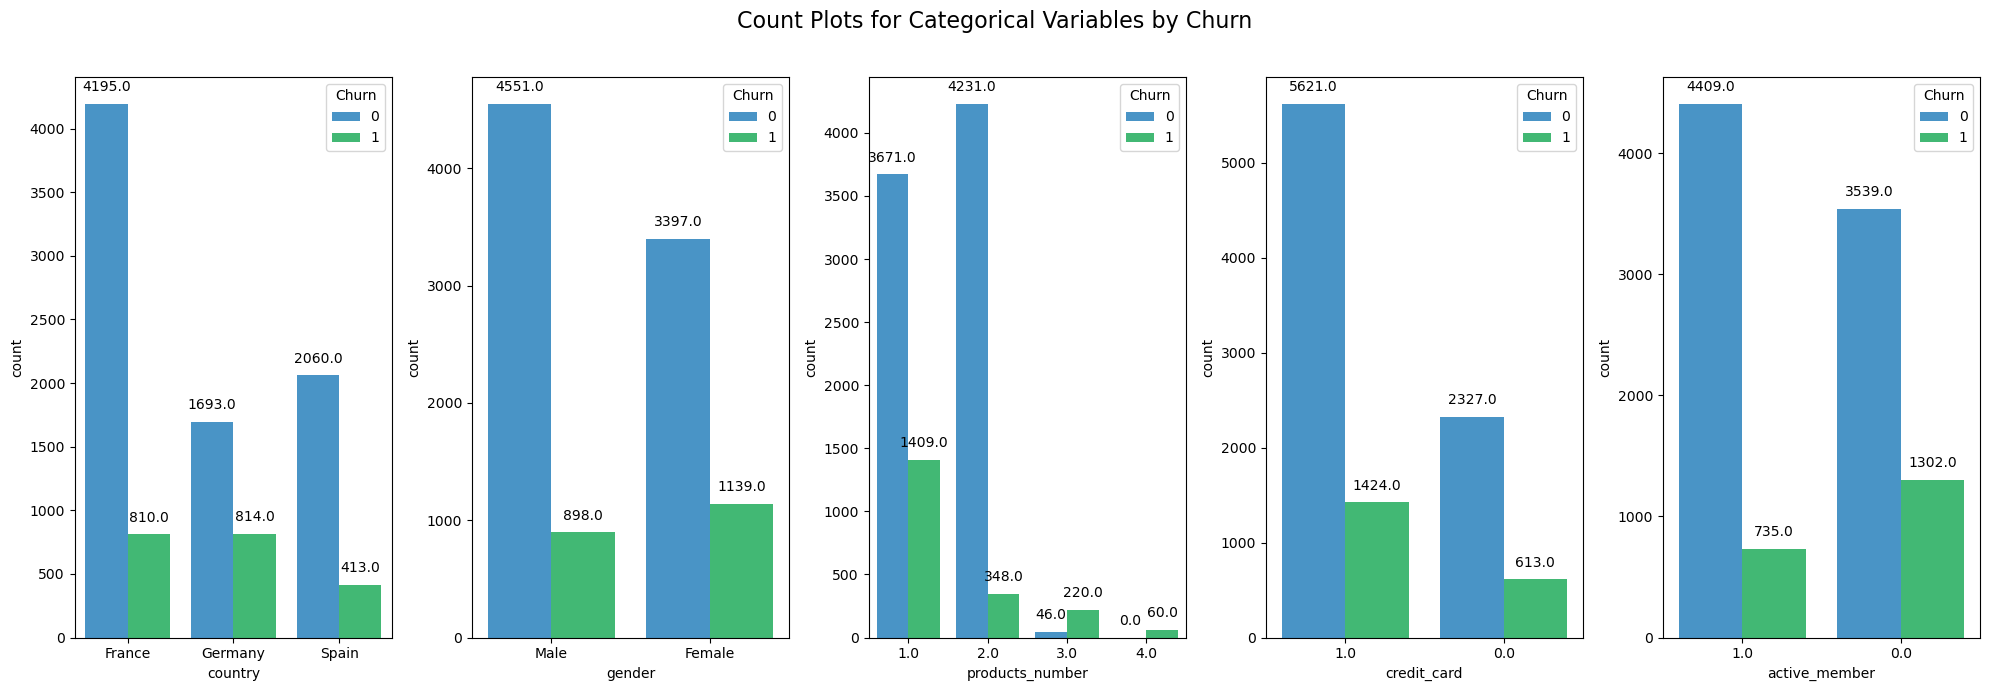

In [79]:
#EDA
#The churn rate varies across different countries. Germany has the highest churn rate, followed by Spain and France
#The churn rate is higher for female customers compared to male customers
#Customer with 3 or 4 products have higher chances to Churn.
#Inactive customers also have greater chances of churn.



import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['country', 'gender', 'products_number','credit_card', 'active_member']

# Set a custom color palette
custom_palette = ['#3498db', '#2ecc71']

fig, axes = plt.subplots(1, len(cat_cols), figsize=(20, 7), sharey=False)
fig.suptitle('Count Plots for Categorical Variables by Churn', fontsize=16)

for i, col in enumerate(cat_cols):
    if col == 'churn':
        sns.countplot(x=dfHR_data[col], palette=custom_palette, ax=axes[i])
        
    else:
        sns.countplot(x=col, hue='churn', data=dfHR_data, palette=custom_palette, ax=axes[i],
                      order=dfHR_data[col].value_counts().index, linewidth=0.5)
      

        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height()}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 12), textcoords='offset points')

        axes[i].legend(title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

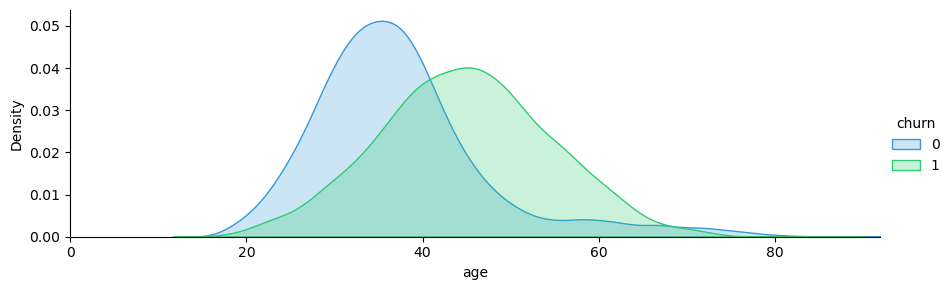

In [80]:
#distribution shows older age customers have high chances of churn.
colors = ['#3498db', '#2ecc71'] 

facet = sns.FacetGrid(dfHR_data, hue="churn",aspect=3,palette=colors)
facet.map(sns.kdeplot,"age",fill= True)
facet.set(xlim=(0, dfHR_data["age"].max()))
facet.add_legend()

plt.show()



C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='country', ylabel='age'>

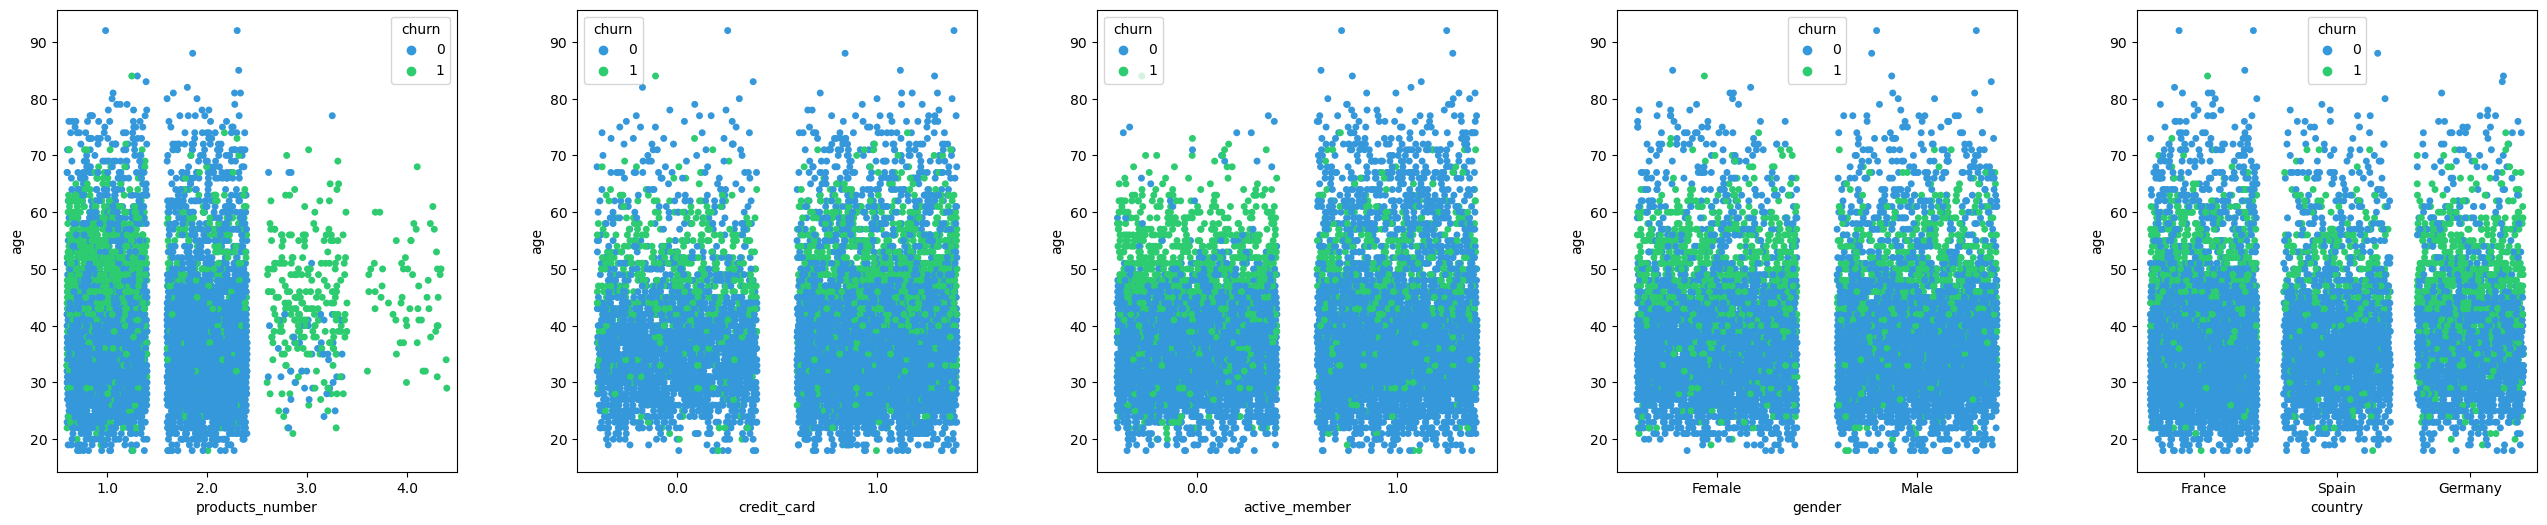

In [82]:
#Customers with 3 or more products have high chances of churn.
#Inactive older age customers have very high chances of churn

import matplotlib.pyplot as plt
import seaborn as sns
_, ax = plt.subplots(1, 5, figsize=(32, 6))
plt.subplots_adjust(wspace=0.3)
sns.stripplot(x="products_number", y="age", hue="churn", data=dfHR_data, jitter=0.4, ax= ax[0],palette=colors)
sns.stripplot(x = "credit_card", y="age", hue="churn", data = dfHR_data, jitter=0.4,ax = ax[1],palette=colors)
sns.stripplot(x = "active_member", y="age", hue="churn", data = dfHR_data, jitter=0.4,ax = ax[2],palette=colors)
sns.stripplot(x = "gender", y="age", hue="churn", data = dfHR_data, jitter=0.4,ax = ax[3],palette=colors)
sns.stripplot(x = "country", y="age", hue="churn", data = dfHR_data, jitter=0.4,ax = ax[4],palette=colors)


C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='age', ylabel='credit_score'>

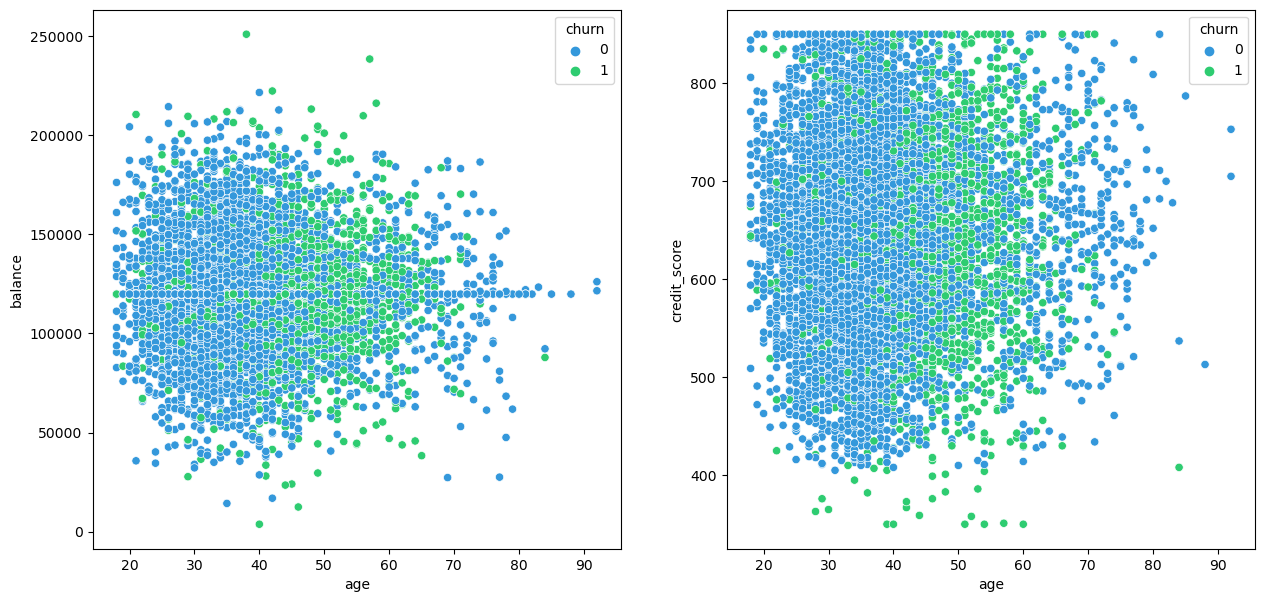

In [33]:
#40 to 70 years old customers are higher chances to churn
#Customer with CreditScore less then 400 are higher chances to churn

_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "age", y = "balance", hue = "churn", sizes = (10, 200), data = dfHR_data, ax=ax[0],palette=custom_palette)
sns.scatterplot(x = "age", y = "credit_score", hue = "churn", sizes = (10, 200), data = dfHR_data, ax=ax[1],palette=custom_palette)


C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='balance', ylabel='credit_score'>

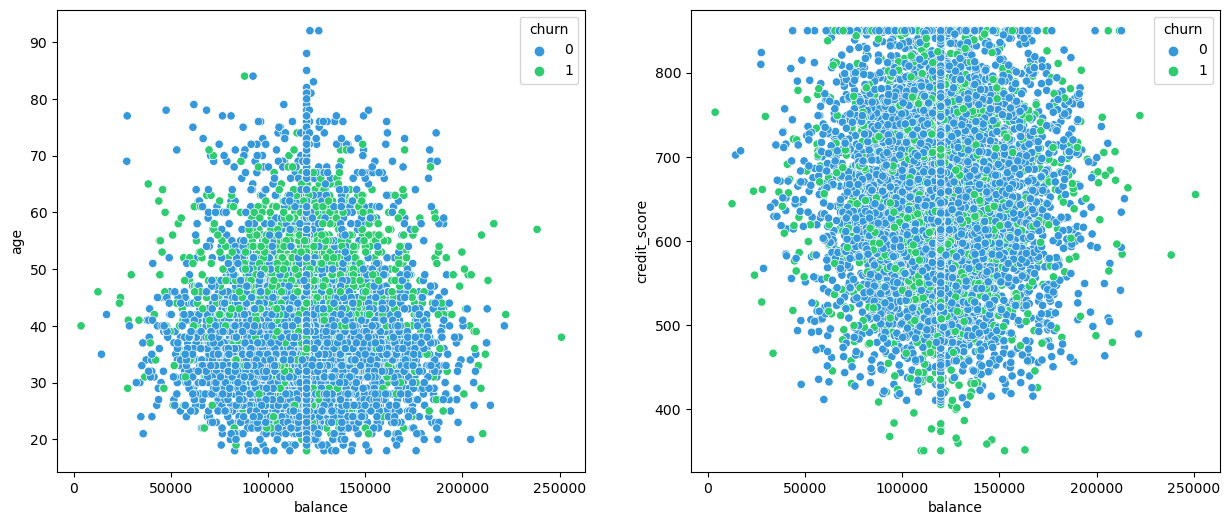

In [83]:
#EDA
#No inference can be made regarding customer's balance having any influence on churn.
custom_palette = ['#3498db', '#2ecc71'] 
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "balance", y = "age", data = dfHR_data, hue="churn", ax = ax[0],palette=custom_palette)
sns.scatterplot(x = "balance", y = "credit_score", data = dfHR_data, hue="churn", ax = ax[1],palette=custom_palette,)

In [12]:
# Dummy coding using pd.get_dummies() and checking dtypes of coded variables
dfHR_data = pd.get_dummies(dfHR_data, drop_first = True, dtype=int)
dfHR_data.head(10)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42.0,2.0,119827.493793,1.0,1.0,1.0,101348.88,1,0,0,0
1,608,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.58,0,0,1,0
2,502,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.57,1,0,0,0
3,699,39.0,1.0,119827.493793,2.0,0.0,0.0,93826.63,0,0,0,0
4,850,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.10,0,0,1,0
5,645,44.0,8.0,113755.780000,2.0,1.0,0.0,149756.71,1,0,1,1
6,822,50.0,7.0,119827.493793,2.0,1.0,1.0,10062.80,0,0,0,1
7,376,29.0,4.0,115046.740000,4.0,1.0,0.0,119346.88,1,1,0,0
8,501,44.0,4.0,142051.070000,2.0,0.0,1.0,74940.50,0,0,0,1
10,528,31.0,6.0,102016.720000,2.0,0.0,0.0,80181.12,0,0,0,1


In [13]:
# Display information about the  DataFrame
dfHR_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9985 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9985 non-null   int64  
 1   age               9985 non-null   float64
 2   tenure            9985 non-null   float64
 3   balance           9985 non-null   float64
 4   products_number   9985 non-null   float64
 5   credit_card       9985 non-null   float64
 6   active_member     9985 non-null   float64
 7   estimated_salary  9985 non-null   float64
 8   churn             9985 non-null   int64  
 9   country_Germany   9985 non-null   int32  
 10  country_Spain     9985 non-null   int32  
 11  gender_Male       9985 non-null   int32  
dtypes: float64(7), int32(3), int64(2)
memory usage: 897.1 KB


In [14]:
# preparing the dependent and independent variables
# make y (dependent variable) as np.array
y = np.array(dfHR_data["churn"])

# make x a dataframe subset with independent variables
X = dfHR_data[["credit_score","age", "tenure", "balance", "products_number", "credit_card", "active_member", "estimated_salary","country_Germany", "country_Spain","gender_Male"]]

# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 0.7837116154873164

Confusion Matrix:
 [[2027  347]
 [ 301  321]]
Precision: 0.481
Recall: 0.516
F1 Score: 0.498


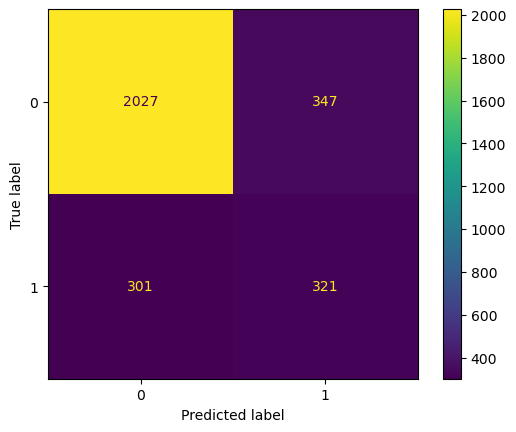

In [15]:
# Decision tree with gini index
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using Gini index
clf_gini_HR = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf_gini_HR.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_dt = clf_gini_HR.predict(X_test)

from sklearn import metrics
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_dt)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred_dt))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred_dt))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred_dt))




Accuracy: 0.8314419225634179

Confusion Matrix:
 [[2354   20]
 [ 485  137]]
Precision: 0.873
Recall: 0.220
F1 Score: 0.352


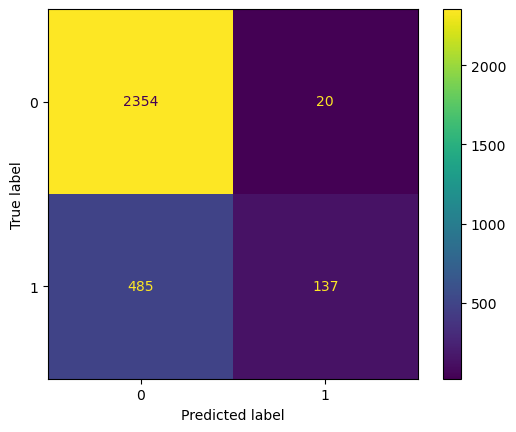

In [16]:
#5(a)
# Random Forest
# import Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
RF_HR = RandomForestClassifier(n_estimators=400, max_features='sqrt', criterion='gini', max_depth=4, random_state=10)

# Train the model
RF_HR.fit(X_train, y_train)

# Model predictions
y_pred_rf = RF_HR.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred_rf))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred_rf))



Accuracy: 0.8551401869158879

Confusion Matrix:
 [[2315   59]
 [ 375  247]]
Precision: 0.807
Recall: 0.397
F1 Score: 0.532


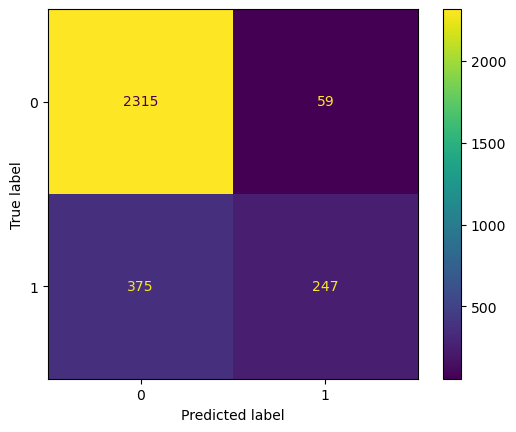

In [16]:
# #5(b) Re-run Random Forest Classifier with a different set of parameters
# Random Forest
# import Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
RF_HR = RandomForestClassifier(n_estimators=400, max_features='sqrt', criterion='gini', max_depth=8, random_state=10)

# Train the model
RF_HR.fit(X_train, y_train)

# Model predictions
y_pred_rf = RF_HR.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred_rf))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred_rf))


Start search time: 2024-02-23 00:26:37.545188
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
Best estimator: RandomForestClassifier(max_depth=8, n_estimators=300, random_state=10)
Feature importance: [0.055045   0.35678274 0.02758935 0.08227355 0.26741036 0.00548754
 0.08136846 0.04960648 0.04951302 0.0066043  0.01831919]
End search time: 2024-02-23 00:29:17.165748

Accuracy: 0.8568090787716955
Precision: 0.814
Recall: 0.402
F1 Score: 0.538


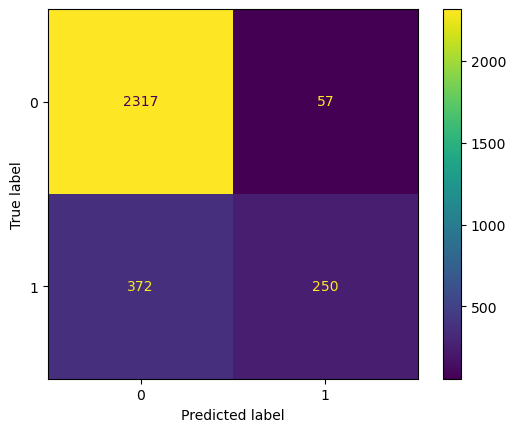

In [57]:
# 5(c). Fine-tune the Random Forest model using GridSearchCV

# Random Forest - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
import matplotlib.pyplot as plt
from datetime import datetime
print("Start search time:", datetime.now())

from sklearn.ensemble import RandomForestClassifier

# find the best parameters
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [100, 200,300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [4, 6, 8],  # Maximum number of levels in tree
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

RF_HR = RandomForestClassifier(random_state=10)

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores;
grid = GridSearchCV(estimator=RF_HR,
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

print("Feature importance:", grid.best_estimator_.feature_importances_)

# end grid search
print("End search time:", datetime.now())

# confusion matrix

final_model_rf = grid.best_estimator_
y_pred = final_model_rf.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred))



C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hridi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


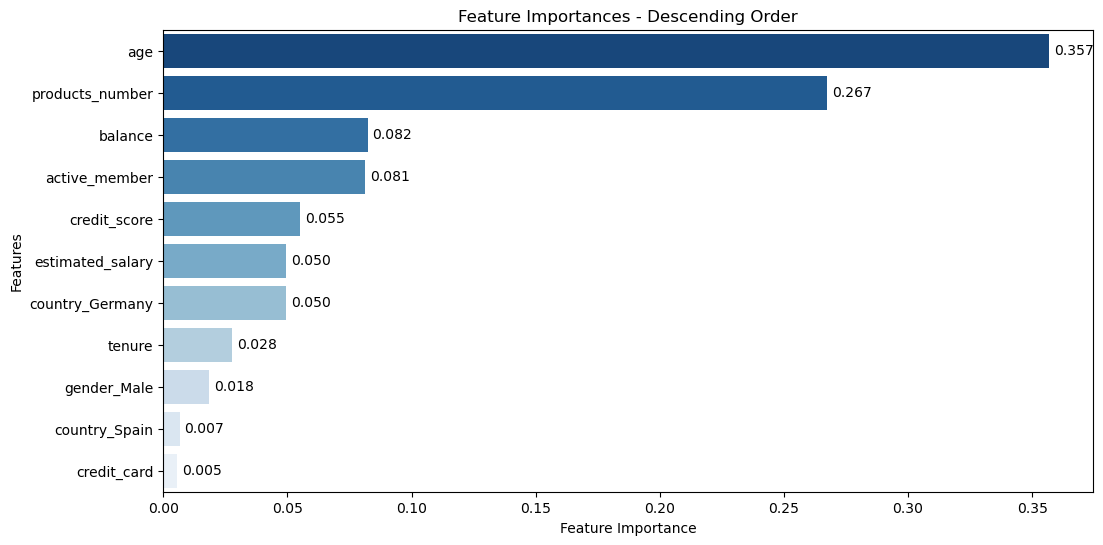

In [56]:
# 5(c) bar plot of feature importance in descending order

import matplotlib.pyplot as plt
import seaborn as sns


#  feature importances
feature_importances = grid.best_estimator_.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]  # Reverse the order for descending importance

# horizontal bar plot with text labels
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Blues", n_colors=len(X_train.columns))
sns.barplot(x=feature_importances[sorted_idx], y=X_train.columns[sorted_idx], palette=palette[::-1])

# text labels
for i, importance in enumerate(feature_importances[sorted_idx]):
    plt.text(importance + 0.01, i, f'{importance:.3f}', ha='center', va='center')

plt.title('Feature Importances - Descending Order')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()



Accuracy: 0.7837116154873164

Confusion Matrix:
 [[2323   51]
 [ 597   25]]
Precision: 0.329
Recall: 0.040
F1 Score: 0.072


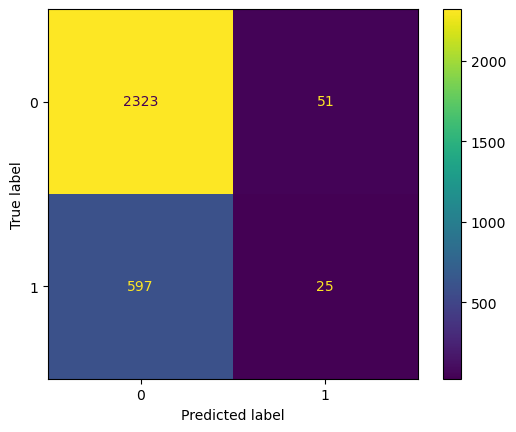

In [17]:
from sklearn.svm import SVC

# Initialize SVM classifier with a linear kernel
svm_classifier_HR = SVC(kernel='linear', gamma=0.1, C=0.01, random_state=42)

# Train the model on the training set
svm_classifier_HR.fit(X_train, y_train)

# Predict the responses for the test set
y_pred_svm = svm_classifier_HR.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred_svm))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred_svm))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred_svm))




Accuracy: 0.7923898531375166

Confusion Matrix:
 [[2374    0]
 [ 622    0]]
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


C:\Users\hridi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


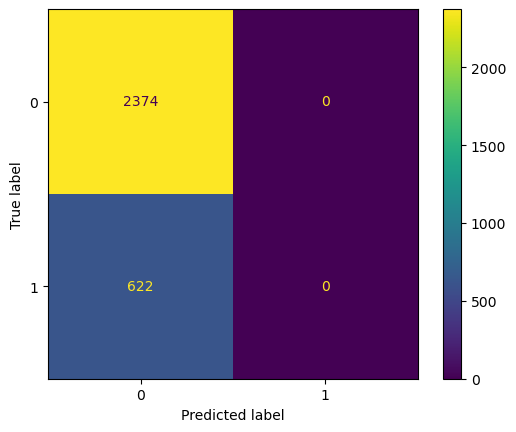

In [18]:
from sklearn.svm import SVC

# Initialize SVM classifier with a linear kernel
svm_classifier_HR = SVC(kernel='rbf', gamma=0.1, C=0.01, random_state=42)

# Train the model on the training set
svm_classifier_HR.fit(X_train , y_train)

# Predict the responses for the test set
y_pred_svm = svm_classifier_HR.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_svm)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred_svm))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred_svm))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred_svm))



Start search time: 2024-02-23 00:54:47.711340
Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best parameters: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator: SVC(C=0.01, gamma=0.1)
End search time: 2024-02-23 02:04:02.105222

Accuracy: 0.7923898531375166


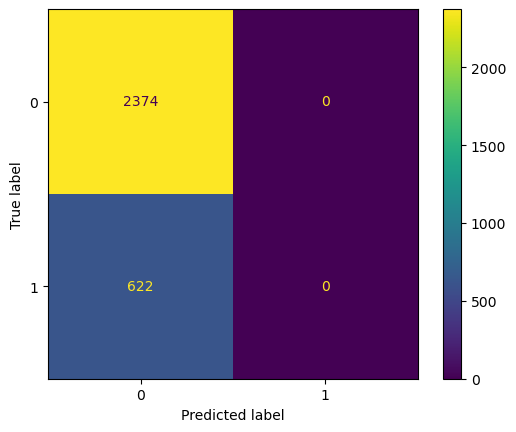

Precision: 0.000
Recall: 0.000
F1 Score: 0.000


C:\Users\hridi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# SVM - Fine tuning with GridSearchCV
# using datetime to time the fine tuning process
from datetime import datetime
print("Start search time:", datetime.now())

# find the best parameters
from sklearn.model_selection import GridSearchCV

# SVM -- Tunning parameters
param = {
    'C':[0.01, 10, 100],
    'gamma': [0.1, 0.5, 1 ], # 1/n_features
    'kernel': ['rbf', 'linear']
}

SVM_HR = SVC()

# search parameters: cv=cross validation blocks; verbose=higher value show more steps
# n_jobs=-1 uses all available CPU cores;
grid = GridSearchCV(estimator=SVM_HR,
                    param_grid=param,
                    scoring="accuracy",
                    verbose=1, cv= 2)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best estimator:", grid.best_estimator_)

# end grid search
print("End search time:", datetime.now())

# confusion matrix

final_model_svm = grid.best_estimator_

y_pred = final_model_svm.predict(X_test)

# get accuracy and confusion matrix
accuracy = metrics.accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = metrics.confusion_matrix(y_test,y_pred) # row - true value; column - predicted
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot()
plt.show() # display all open figures
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred))